In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO
import subprocess

c:\users\madhumita.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
#visualization
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
cement_data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data',index_col=0)

In [4]:
cement_data.columns = cement_data.columns.str.lower().str.replace(" ","_").str.replace(".","")

In [5]:
cement_data.columns

Index(['cement', 'slag', 'fly_ash', 'water', 'sp', 'coarse_aggr', 'fine_aggr',
       'slump(cm)', 'flow(cm)', 'compressive_strength_(28-day)(mpa)'],
      dtype='object')

# REGRESSION USING DECISION TREE

In [6]:
X,y=cement_data.iloc[:,:7],cement_data.iloc[:,-1]

In [7]:
feature_names_cem = X.columns.tolist()
target_name = cement_data.columns.tolist()[-1]
cement_data["compressive_strength_bins"]=pd.cut(cement_data[target_name],5)

In [8]:
cement_data.compressive_strength_bins.value_counts()

(33.726, 41.994]    40
(25.458, 33.726]    37
(41.994, 50.262]    17
(17.149, 25.458]     5
(50.262, 58.53]      4
Name: compressive_strength_bins, dtype: int64

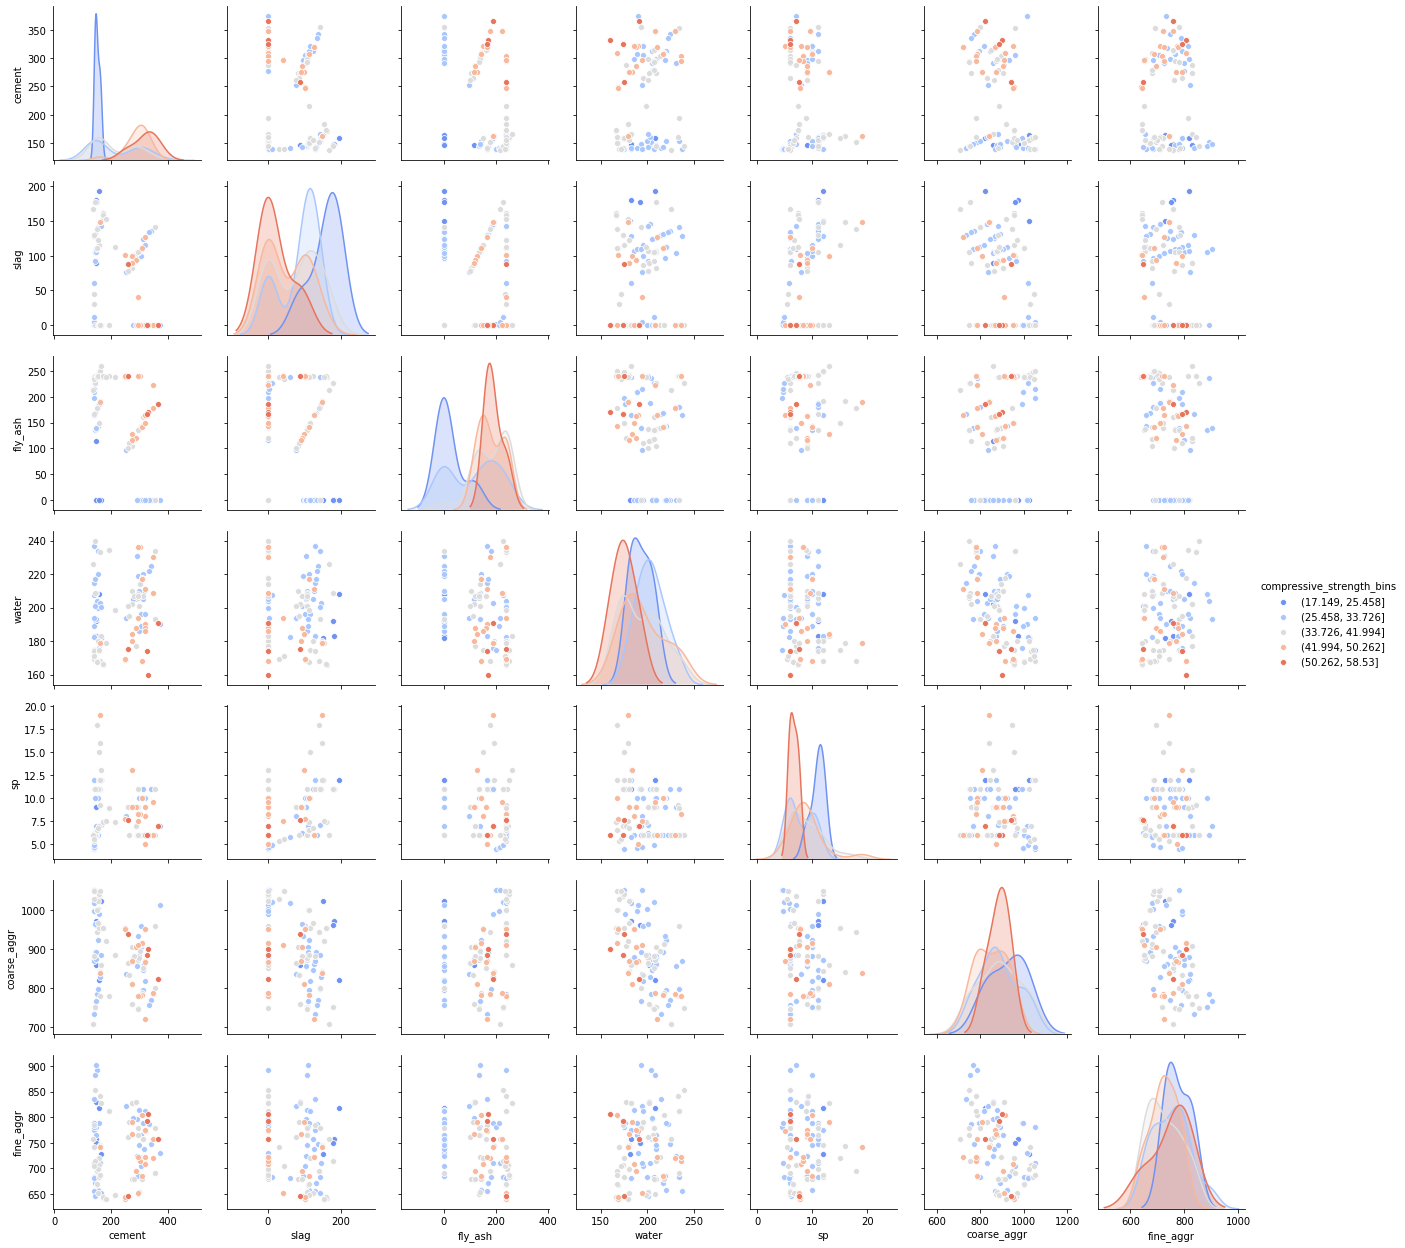

In [9]:
sns.pairplot(cement_data[feature_names_cem+['compressive_strength_bins']],hue="compressive_strength_bins", palette='coolwarm')

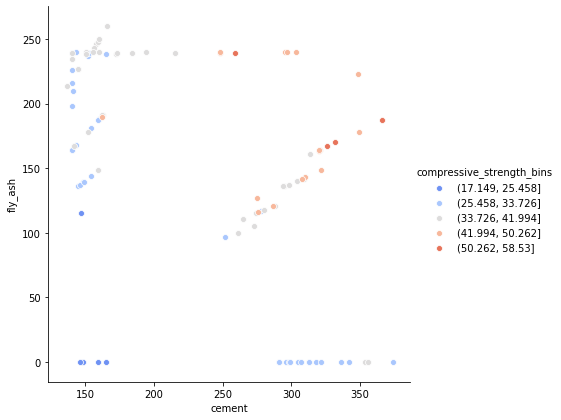

In [10]:
sns.pairplot(cement_data,
             x_vars=['cement'],
             y_vars=["fly_ash"],
             hue='compressive_strength_bins',
             height=6,
             palette="coolwarm")

In [11]:
## Build test-train model to apply using decision trees
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=20)

In [12]:
decisiontree=DecisionTreeRegressor(max_depth=2)
decisiontree.fit(X_train,y_train)
y_prediction = decisiontree.predict(X_test)
print("Decision tree RMSE is : ",np.sqrt(mean_squared_error(y_test,y_prediction)))

Decision tree RMSE is :  5.322294496412798


In [13]:
## Visualtizing the decision tree
import subprocess

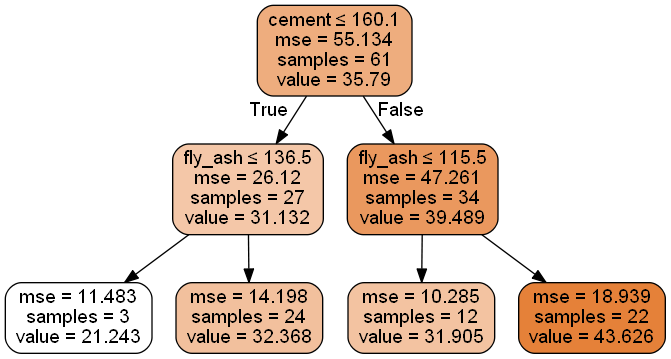

In [14]:
dot_data = StringIO()  
export_graphviz(decisiontree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##value = mean compressive strength

In [15]:
np.unique(decisiontree.predict(X_test))

array([21.24333333, 31.905     , 32.36833333, 43.62636364])

In [16]:
## Decision tree model to predict slump with the input features

cement_data.columns
X_s,y_s=cement_data.iloc[:,:7],cement_data.iloc[:,-4]

feature_names_s = X_s.columns.tolist()
target_name_s = cement_data.columns.tolist()[-4]
cement_data["slump_bins"]=pd.cut(cement_data[target_name],5)

In [17]:
X_trains,X_tests,y_trains,y_tests=train_test_split(X_s,y_s,test_size=0.4,random_state=20)

In [18]:
decisiontree_s=DecisionTreeRegressor(max_depth=3)
decisiontree_s.fit(X_trains,y_trains)
y_prediction_s = decisiontree_s.predict(X_tests)
print("Decision tree RMSE is : ",np.sqrt(mean_squared_error(y_tests,y_prediction_s)))

Decision tree RMSE is :  6.3589536966996025


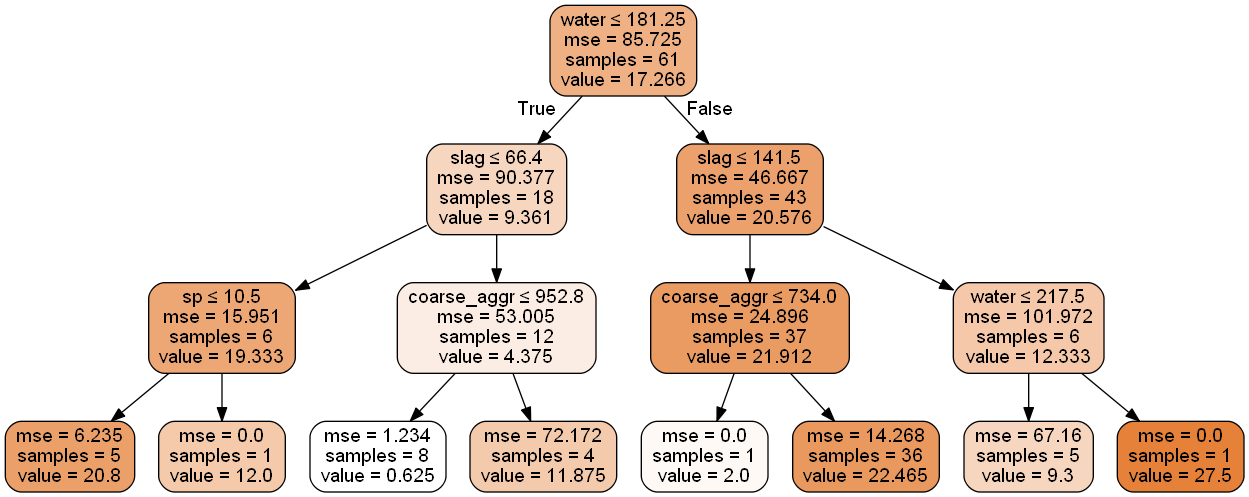

In [19]:
import subprocess
dot_data = StringIO()  
export_graphviz(decisiontree_s, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
best_single_tree = DecisionTreeRegressor(max_depth=3, random_state=1)
best_single_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [21]:
pd.DataFrame({'feature':feature_names_cem, 'importance':best_single_tree.feature_importances_})

,feature,importance
0,cement,0.377599
1,slag,0.018253
2,fly_ash,0.501815
3,water,0.090038
4,sp,0.012295
5,coarse_aggr,0.000000
6,fine_aggr,0.000000


In [22]:
y_pred = best_single_tree.predict(X_test)
y_pred

array([30.45      , 34.815     , 40.69333333, 26.02      , 45.65692308,
       40.69333333, 36.72      , 45.65692308, 40.69333333, 34.815     ,
       31.22315789, 40.69333333, 31.22315789, 31.22315789, 40.69333333,
       34.815     , 45.65692308, 18.855     , 31.22315789, 40.69333333,
       40.69333333, 40.69333333, 30.45      , 45.65692308, 30.45      ,
       45.65692308, 45.65692308, 40.69333333, 45.65692308, 45.65692308,
       40.69333333, 30.45      , 36.72      , 30.45      , 30.45      ,
       36.72      , 30.45      , 31.22315789, 31.22315789, 40.69333333,
       31.22315789, 45.65692308])

In [23]:
# calculate test set RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

4.395463024956621

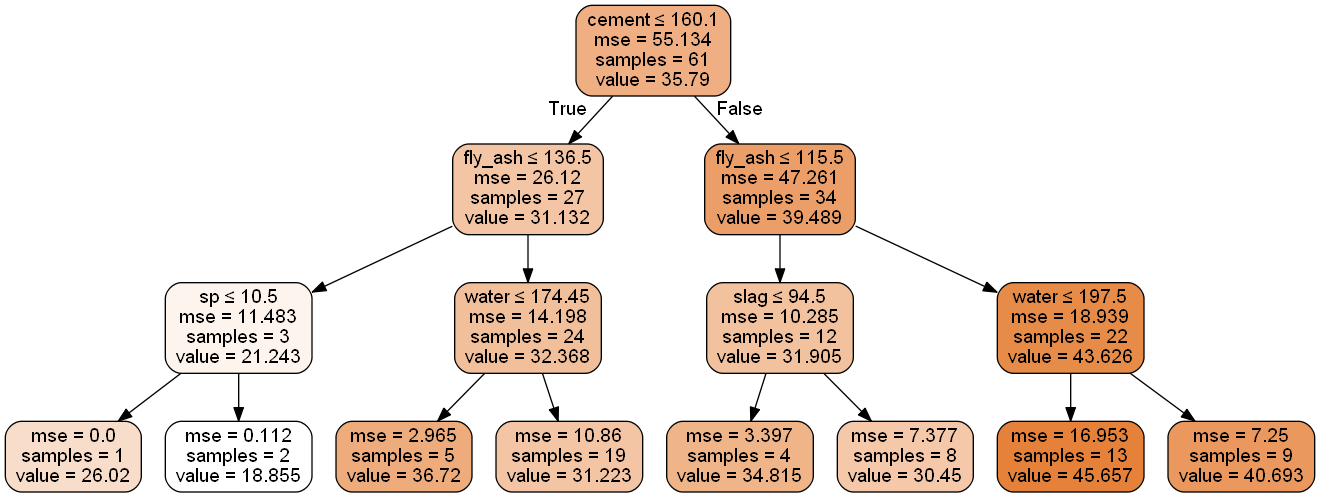

In [24]:
import subprocess
dot_data = StringIO()  
export_graphviz(best_single_tree, out_file=dot_data,  
                    feature_names=X_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# CLASSIFICATION MODEL USING DECISION TREES
#Decision Tree Model to Predict whether Barack Obama or Hillary Clinton will win the Democratic primary in a particular county in 2008

In [25]:
occupancy_data_train = pd.read_csv("C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/datatraining.txt",index_col=0)
occupancy_data_train.date = pd.to_datetime(occupancy_data_train.date) # convert the date column to an actual pandas datetime object
occupancy_data_train.columns = occupancy_data_train.columns.str.lower() #clean up column names by lowercasing them
print(occupancy_data_train.head())

                 date  temperature  humidity  light     co2  humidityratio  \
1 2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2 2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3 2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4 2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5 2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   occupancy  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
5        1.0  


In [26]:
# read in the testing data
occupancy_data_test = pd.read_csv("C:/Users/Madhumita.Ganesan/Desktop/DataScience/data/datatest.txt",index_col=0)
occupancy_data_test.date = pd.to_datetime(occupancy_data_test.date) # convert the date column to an actual pandas datetime object
occupancy_data_test.columns = occupancy_data_test.columns.str.lower() #clean up column names by lowercasing them
print(occupancy_data_test.head())

                   date  temperature  humidity       light         co2  \
140 2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
141 2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000   
142 2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
143 2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
144 2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

     humidityratio  occupancy  
140       0.004764          1  
141       0.004773          1  
142       0.004765          1  
143       0.004744          1  
144       0.004767          1  


In [27]:
# define X and y - dont use date column as a feature
feature_cols_occ = ["temperature","humidity","light","co2","humidityratio"]
X_occ_train = occupancy_data_train[feature_cols_occ]
y_occ_train = occupancy_data_train.occupancy
X_occ_test = occupancy_data_test[feature_cols_occ]
y_occ_test = occupancy_data_test.occupancy
y_occ_train.fillna(0.0)

X_occ_test=X_occ_test.reset_index()
X_occ_train=X_occ_train.reset_index()


y_occ_train=y_occ_train.reset_index()
y_occ_test=y_occ_test.reset_index()

In [28]:
# fit a classification tree with max_depth=3 on all of the training data
from sklearn.tree import DecisionTreeClassifier
occupancy_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
occupancy_tree.fit(X_occ_train, y_occ_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
dot_data_occ = StringIO()  
export_graphviz(occupancy_tree, out_file=dot_data_occ,  
                    feature_names=X_occ_train.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  
occ_graph = pydotplus.graph_from_dot_data(dot_data_occ.getvalue())  
Image(occ_graph.create_png())